In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)

In [4]:
X.shape

(100, 1)

In [7]:
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

In [13]:
y_1.shape

(20000, 2)

In [14]:
y_2.shape

(20000, 2)

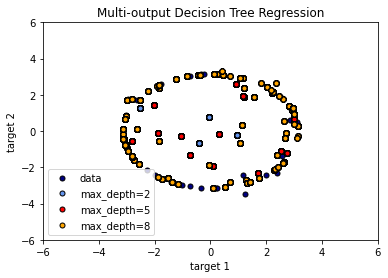

In [17]:
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c='navy', s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
#plt.plot(y_1[:, 0], y_1[:, 1], c="cornflowerblue",
#         label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()